# Exporatory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import datetime
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv("Clicked Ads Dataset.csv")
df.drop('Unnamed: 0', axis=1, inplace=True)
df.sample(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
932,63.30,38,441499380.0,116.19,Perempuan,5/9/2016 7:13,Yes,Surabaya,Jawa Timur,Furniture
16,55.39,37,167558020.0,129.41,Perempuan,1/30/2016 19:20,Yes,Semarang,Jawa Tengah,Finance
193,43.67,53,322030170.0,143.79,Laki-Laki,7/21/2016 21:16,Yes,Jakarta Utara,Daerah Khusus Ibukota Jakarta,Travel
289,60.53,24,468117300.0,167.22,Perempuan,3/25/2016 15:17,Yes,Jakarta Selatan,Daerah Khusus Ibukota Jakarta,Otomotif
820,57.51,38,333775960.0,105.71,Perempuan,3/31/2016 8:53,Yes,Jakarta Selatan,Daerah Khusus Ibukota Jakarta,Bank


## Data Summary

* The dataset contains 1,000 unique observations with 10 features in various data type float64(3), int64(1), object(8). 
* Each row represent users' demographics, and behavior records on website and ads. 
* There are missing values in 4 columns (`Daily Time Spent on Site`, `Area Income`, `Daily Internet Usage`, `Male`), and 1 misdefined data type (`Timestamp`).

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Male                      997 non-null    object 
 5   Timestamp                 1000 non-null   object 
 6   Clicked on Ad             1000 non-null   object 
 7   city                      1000 non-null   object 
 8   province                  1000 non-null   object 
 9   category                  1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 78.2+ KB


## Descriptive Statistics

* The smallest area income is IDR 97,975,500 and the highest is IDR 556,393,600 or 5.7x higher. This means that site visitors are people belonging to different social classes. 
* Users spend between 32 and 91 minutes on the website in one session. This shows that the website itself is quite engaging.
* The average age of a visitor is 36 years. The youngest user has 19 and the oldest is 61 years old. We can conclude that the site is targeting adult users. 
* The site is visited slightly more by women.

In [4]:
num_cols = df.select_dtypes(include = 'number').columns
cat_cols = df.select_dtypes(include = ['object']).columns

In [5]:
df[cat_cols].describe()

,Male,Timestamp,Clicked on Ad,city,province,category
count,997,1000,1000,1000,1000,1000
unique,2,997,2,30,16,10
top,Perempuan,5/26/2016 15:40,No,Surabaya,Daerah Khusus Ibukota Jakarta,Otomotif
freq,518,2,500,64,253,112


In [6]:
df[num_cols].describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,987.000000,1000.000000,9.870000e+02,989.000000
mean,64.929524,36.009000,3.848647e+08,179.863620
std,15.844699,8.785562,9.407999e+07,43.870142
min,32.600000,19.000000,9.797550e+07,104.780000
25%,51.270000,29.000000,3.286330e+08,138.710000
50%,68.110000,35.000000,3.990683e+08,182.650000
75%,78.460000,42.000000,4.583554e+08,218.790000
max,91.430000,61.000000,5.563936e+08,267.010000


In [7]:
cols = ['Male', 'Clicked on Ad', 'city', 'province', 'category']
for col in cols:
    print(col)
    print(f"Unique values: {len(df[col].unique())}")
    print(df[col].value_counts(normalize=True).mul(100).round(decimals=2))
    print()

Male
Unique values: 3
Perempuan    51.96
Laki-Laki    48.04
Name: Male, dtype: float64

Clicked on Ad
Unique values: 2
No     50.0
Yes    50.0
Name: Clicked on Ad, dtype: float64

city
Unique values: 30
Surabaya             6.4
Bandung              6.4
Jakarta Timur        6.3
Jakarta Selatan      6.1
Jakarta Barat        5.7
Bekasi               5.6
Medan                4.8
Jakarta Utara        4.5
Palembang            4.2
Semarang             4.1
Batam                3.4
Makassar             3.3
Tangerang Selatan    3.3
Tangerang            3.2
Depok                3.0
Bandar Lampung       2.9
Bogor                2.8
Jakarta Pusat        2.7
Malang               2.6
Banjarmasin          2.3
Pakanbaru            2.3
Denpasar             2.1
Padang               1.9
Balikpapan           1.8
Cimahi               1.7
Samarinda            1.6
Tasikmalaya          1.5
Pontianak            1.2
Surakarta            1.2
Serang               1.1
Name: city, dtype: float64

province
Unique val

## Feature Engineering

* Convert `Timestamp` data type to datetime
* Extract new column from `Timestamp` month

In [3]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [9]:
df.Timestamp.dt.year.value_counts()

2016    1000
Name: Timestamp, dtype: int64

In [10]:
df.Timestamp.dt.month.value_counts(normalize=True).mul(100)

2    16.0
3    15.6
4    14.7
1    14.7
5    14.7
6    14.2
7    10.1
Name: Timestamp, dtype: float64

In [5]:
df.Timestamp.dt.week.value_counts()

6     49
14    43
22    42
24    40
12    40
1     40
11    39
21    39
7     39
16    38
8     36
10    35
4     33
2     32
17    32
18    31
5     31
27    31
9     31
25    31
28    30
26    30
29    29
15    29
23    28
19    28
13    26
20    26
3     23
53    19
Name: Timestamp, dtype: int64

In [4]:
df.Timestamp.dt.day.value_counts()

3     46
17    42
15    41
10    37
26    36
4     36
16    35
23    35
5     35
27    35
18    35
8     35
9     34
20    33
24    33
14    33
1     33
11    32
7     32
21    32
28    30
13    30
29    29
12    29
19    29
30    28
2     25
6     25
22    24
25    23
31    18
Name: Timestamp, dtype: int64

In [6]:
df.Timestamp.dt.dayofweek.value_counts()

6    159
2    156
4    155
3    142
0    140
5    126
1    122
Name: Timestamp, dtype: int64

In [4]:
df['Year'] = df.Timestamp.dt.year
df['Month'] = df.Timestamp.dt.month
df['Week'] = df.Timestamp.dt.week
df['Day'] = df.Timestamp.dt.day
df['Day_of_Week'] = df.Timestamp.dt.dayofweek

df.sample(1)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category,Year,Month,Week,Day,Day_of_Week
237,65.65,30,505469930.0,158.05,Perempuan,2016-07-02 21:22:00,No,Banjarmasin,Kalimantan Selatan,Electronic,2016,7,26,2,5


## Univariate Analysis

### Numerical Features

* There are outliers in `Area Income`
* Distribution of `Age` and `Area Income` are slightly skewed, however it can be concluded that it follows normal distribution.
* Users who didn't click ads are younger, and have higher `Daily Time Spend on Site`, `Daily Internet Usage`, and `Area Income` compared to the users who clicked the ads.
* The younger users (age between 20-40) spend more time on website. They can be the main target for marketing campaign, but most of them tend to not click ads. It indicates that the website contents still can not lead them to do an action (interested in the advertisement). 
* The ads is more attractive to the older users (over 40), even though they have a lower daily time spent.

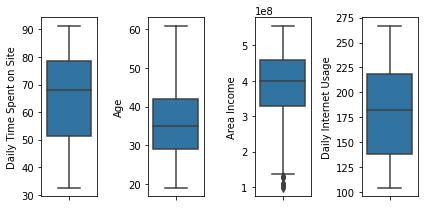

In [34]:
plt.figure(figsize=(6, 3))
for i in range(len(num_cols)):
    plt.subplot(1, 4, i+1)
    sns.boxplot(y=df[num_cols[i]])
    plt.tight_layout()

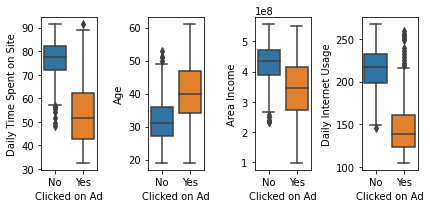

In [36]:
plt.figure(figsize=(6, 3))
for i in range(len(num_cols)):
    plt.subplot(1, 4, i+1)
    sns.boxplot(y=df[num_cols[i]], x=df['Clicked on Ad'])
    plt.tight_layout()

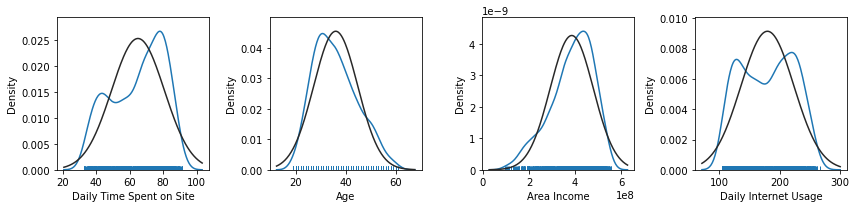

In [40]:
plt.figure(figsize=(12, 3))
for i in range(len(num_cols)):
    plt.subplot(1, 4, i+1)
    sns.distplot(x=df[num_cols[i]], hist=False, rug=True, fit=norm)
    plt.xlabel(num_cols[i])
    plt.tight_layout()

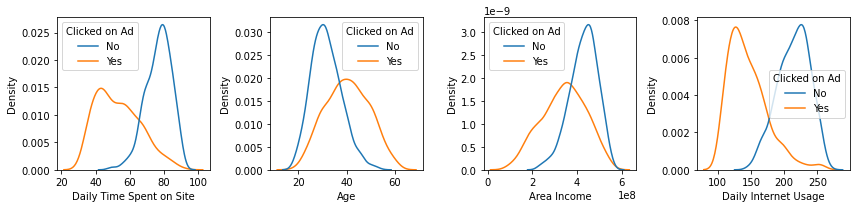

In [39]:
plt.figure(figsize=(12, 3))
for i in range(len(num_cols)):
    plt.subplot(1, 4, i+1)
    sns.kdeplot(x=df[num_cols[i]], hue=df['Clicked on Ad'])
    plt.tight_layout()

### Categorical Features

* Unique values of `city` and `province` are a lot and the distributions are uneven. So it's better to drop these features since it won't help in modeling.

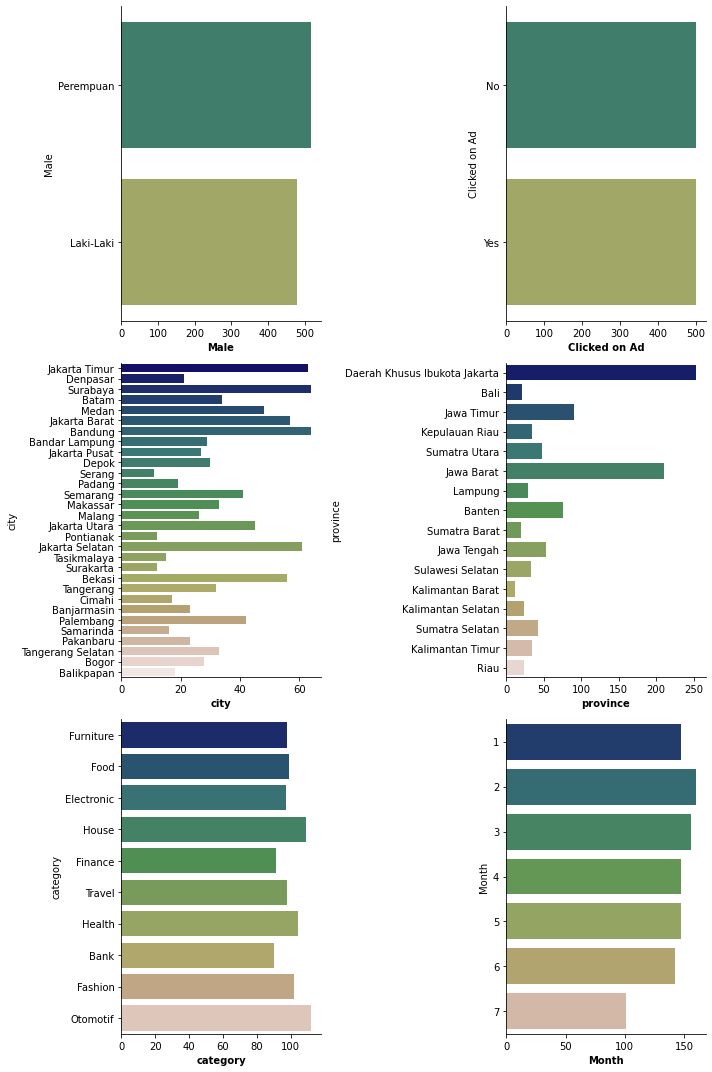

In [74]:
cols = ['Male', 'Clicked on Ad', 'city', 'province', 'category', 'Month']
plt.figure(figsize=(10,15))
for i in range(len(cols)):
    plt.subplot(3,2, i+1)
    sns.countplot(y=df[cols[i]], palette='gist_earth')
    plt.xlabel(cols[i], fontweight='bold')
    plt.xticks(rotation=0)
    sns.despine()
    plt.tight_layout()

## Bivariate Analysis

### Numerical Features

<Figure size 576x576 with 0 Axes>

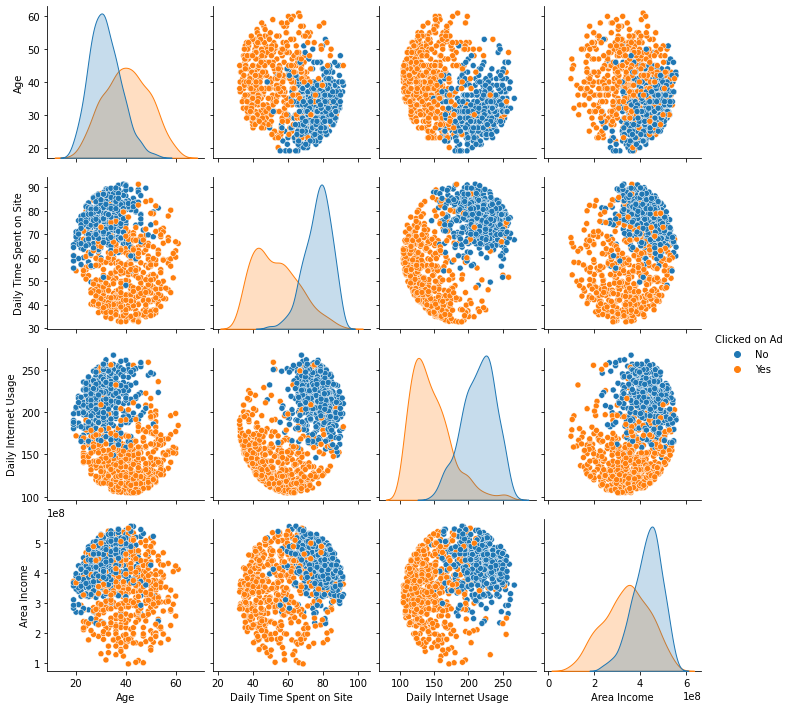

In [51]:
plt.figure(figsize=(8, 8))
sns.pairplot(df[['Age','Daily Time Spent on Site','Daily Internet Usage',
                 'Area Income','Clicked on Ad']], diag_kind='kde',hue='Clicked on Ad')
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Daily Time Spent on Site'>

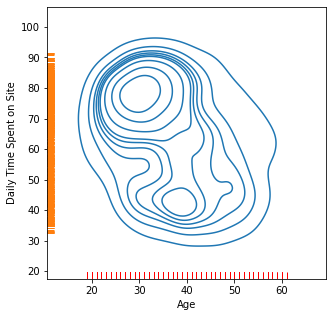

In [16]:
f, ax = plt.subplots(figsize=(5, 5))
sns.kdeplot(df['Age'], df['Daily Time Spent on Site'], ax=ax)
sns.rugplot(df['Age'], color="r", ax=ax)
sns.rugplot(df['Daily Time Spent on Site'], vertical=True, ax=ax)

<AxesSubplot:xlabel='Area Income', ylabel='Daily Time Spent on Site'>

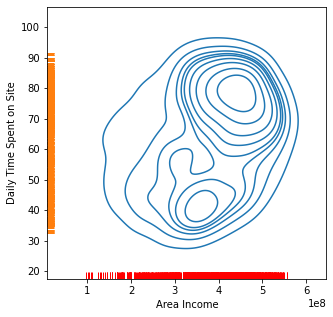

In [17]:
f, ax = plt.subplots(figsize=(5, 5))
sns.kdeplot(df['Area Income'], df['Daily Time Spent on Site'], ax=ax)
sns.rugplot(df['Area Income'], color="r", ax=ax)
sns.rugplot(df['Daily Time Spent on Site'], vertical=True, ax=ax)

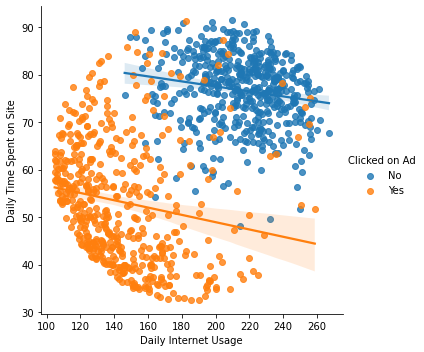

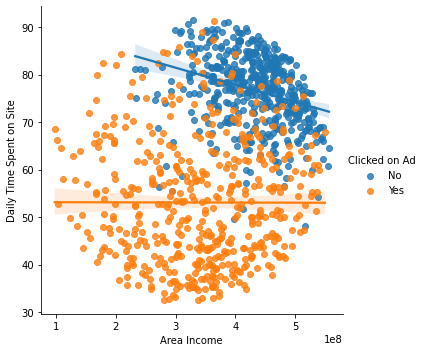

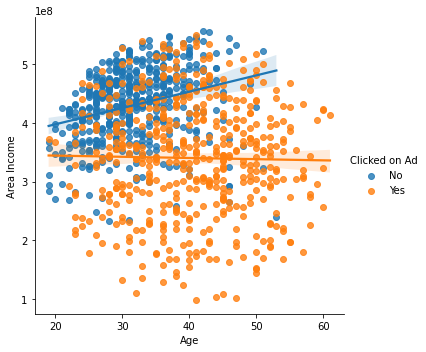

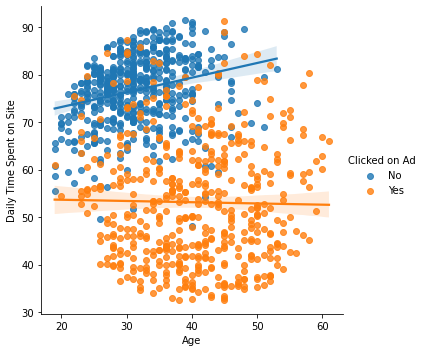

In [18]:
ax = sns.lmplot(x='Daily Internet Usage', y='Daily Time Spent on Site', data=df, hue='Clicked on Ad')
ax = sns.lmplot(x='Area Income', y='Daily Time Spent on Site', data=df, hue='Clicked on Ad')
ax = sns.lmplot(x='Age', y='Area Income', data=df, hue='Clicked on Ad')
ax = sns.lmplot(x='Age', y='Daily Time Spent on Site', data=df, hue='Clicked on Ad')

### Categorical Features

* Female users are slightly more likely to click on ads.
* The category with the highest ad clicks rate is Finance, followed by Fashion. Meanwhile the lowest ad clicks rate is in the Bank category, followed by Furniture.
* The highest percentage of ad clicks by users is in May, and the lowest is in January.
* Users from Bandung, Serang, Bekasi, Cimahi and Tangerang Selatan are more likely to click the ads. Meanwhile users from Jakarta Pusat, Semarang, Jakarta Utara, Balikpapan, and Samarinda are more likely to not click the ads.

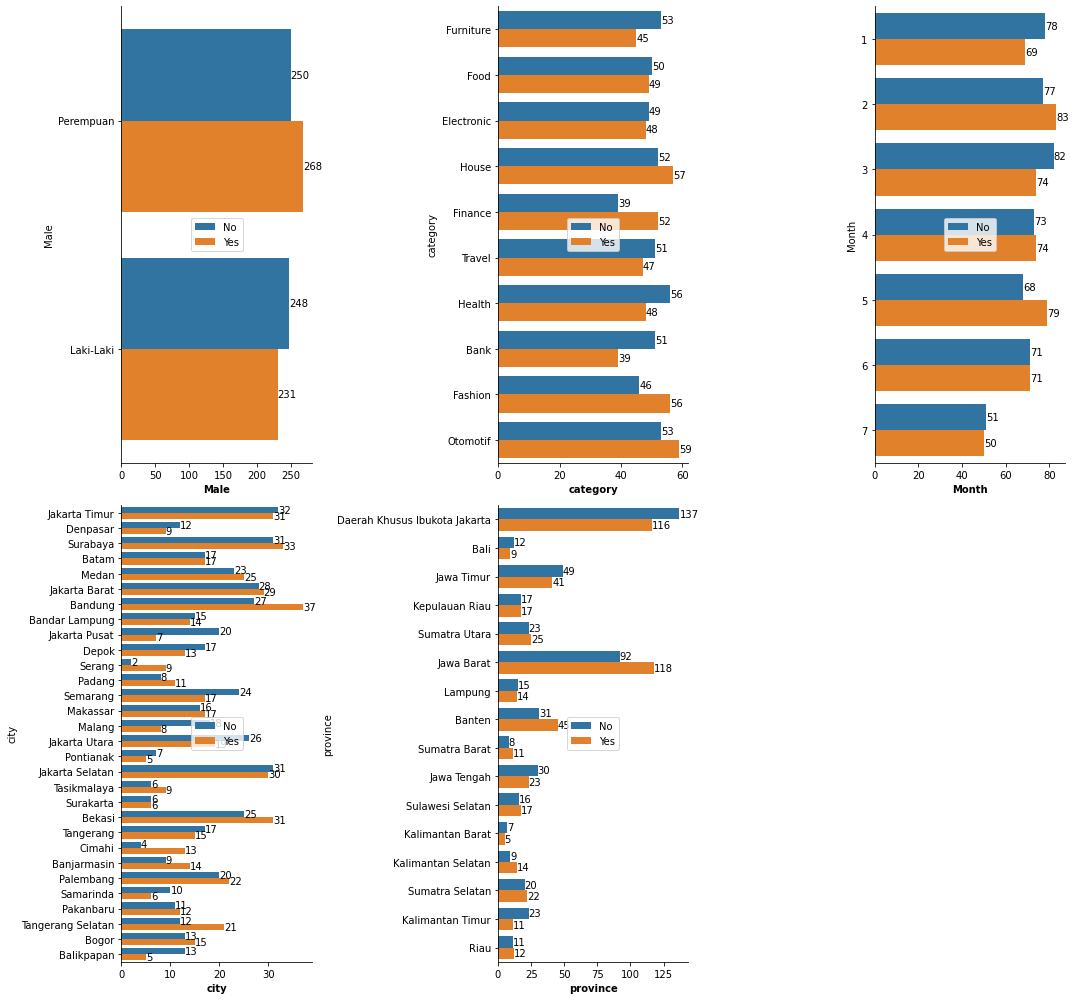

In [12]:
cols = ['Male', 'category', 'Month', 'city', 'province']
plt.figure(figsize=(15,14))
for i in range(len(cols)):
    plt.subplot(2,3, i+1)
    ax = sns.countplot(y=df[cols[i]], hue=df['Clicked on Ad'])
    plt.bar_label(ax.containers[0])
    plt.bar_label(ax.containers[1])
    plt.xlabel(cols[i], fontweight='bold')
    plt.xticks(rotation=0)
    plt.legend(loc='center')
    sns.despine()
    plt.tight_layout()

## Multivariate Analysis

* Users who spend more time on the internet also spend more time on the site.
* Older users are more likely to have low daily interner usage, so their daily spent time on site is also low.
* Users with a higher area income tend to spend on site longer per day.
* Month doesn't correlate to any users' behaviours.

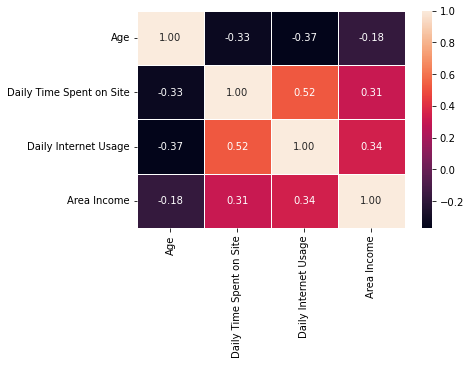

In [19]:
cols = ['Age','Daily Time Spent on Site','Daily Internet Usage','Area Income']
plt.figure(figsize=(6, 4))
sns.heatmap(df[cols].corr(), annot=True, fmt='.2f', linewidth=1)
plt.show()